<h2>IMPORTING THE REQUIRED LIBRARIES</h2>

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from fitter import Fitter, get_common_distributions, get_distributions

from IPython import display

<h2>IMPORTING THE DATA</h2>

In [2]:
customer_df = pd.read_csv('files_for_lab/customer.csv')

<h2>GETTING ONLY THE NUMERICAL COLUMNS FROM THE DATAFRAME</h2>

In [10]:
numerical_customer_df = customer_df.select_dtypes(include = np.number).drop(columns = ['Number of Open Complaints', 'Number of Policies'])

<h2>CHECKING THE DISTRIBUTION FOR ALL THE NUMERICAL FEATURES</h2>

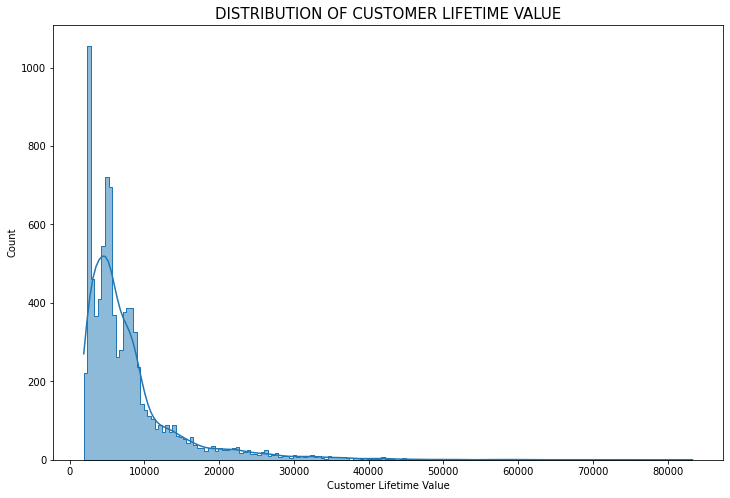

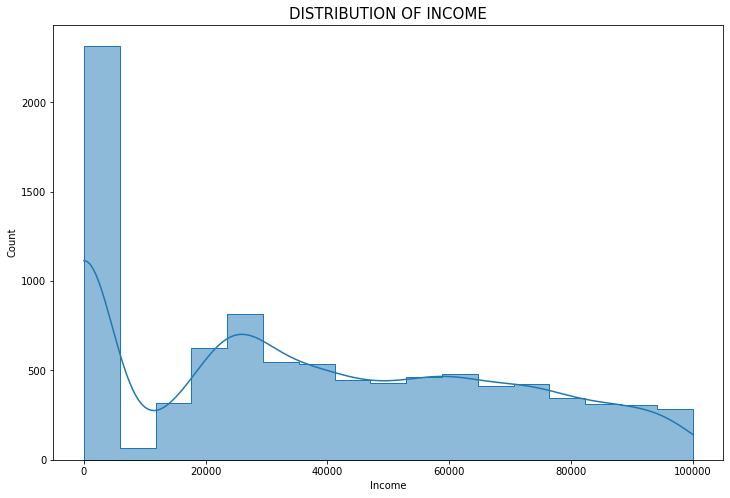

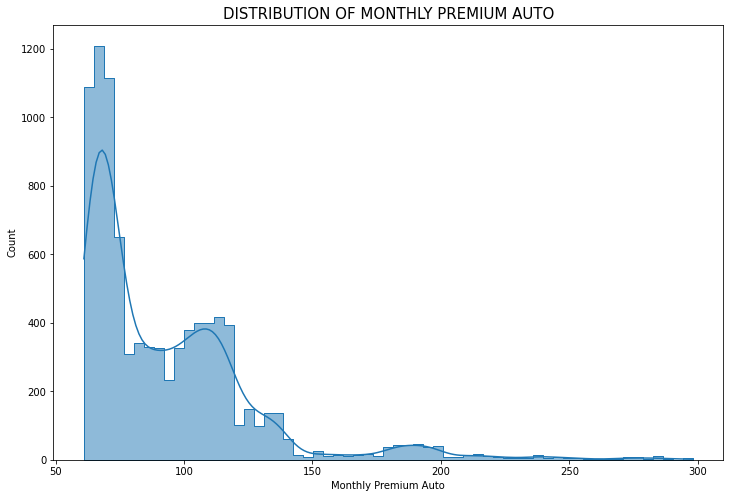

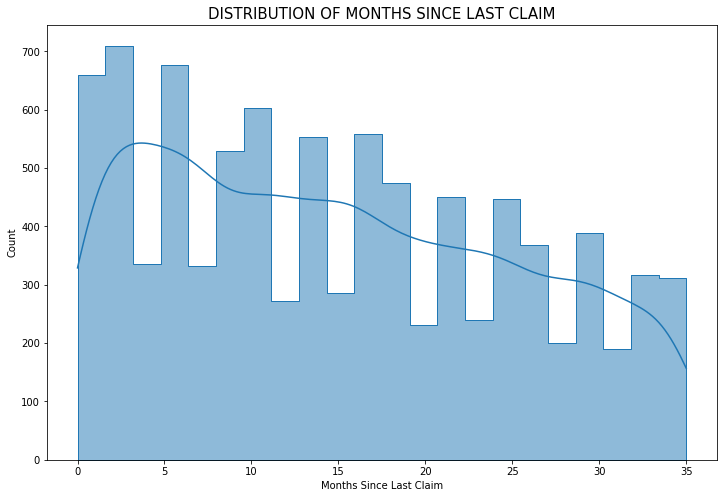

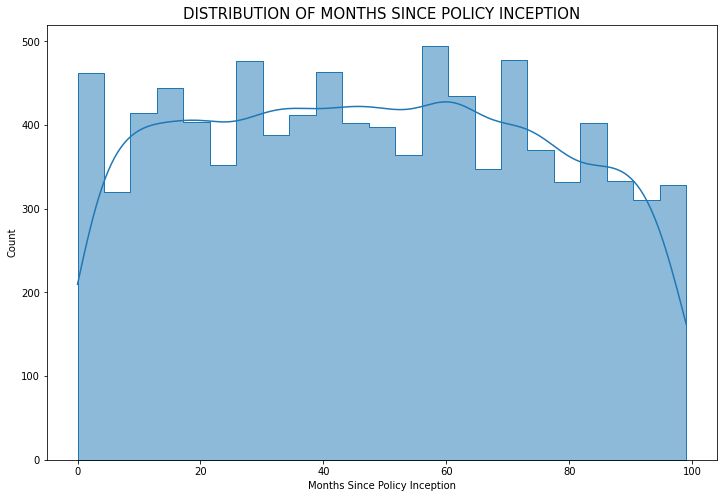

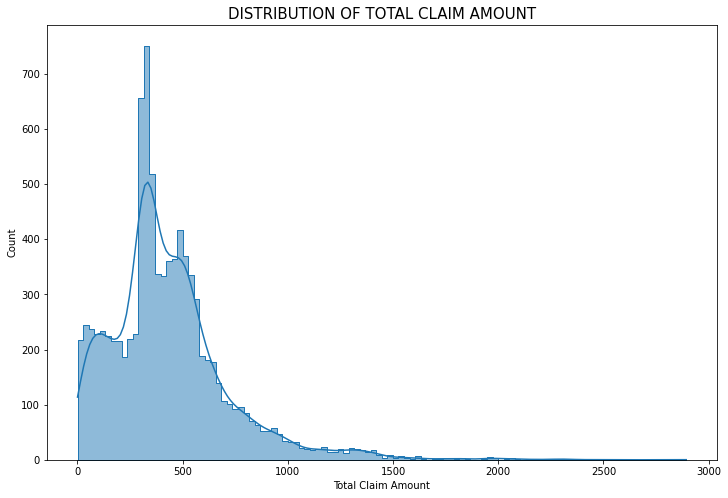

In [17]:
for column in numerical_customer_df.columns:

    fig = plt.figure(figsize = (12, 8))

    plt.title(f'DISTRIBUTION OF {column.upper()}', fontsize = 15)
    sns.histplot(x = column, data = numerical_customer_df, element = 'step', kde = True)

    plt.show()

<h2>CHECKING THE BEST PROBABILITY DISTRIBUTION FOR EVERY NUMERICAL FEATURE</h2>

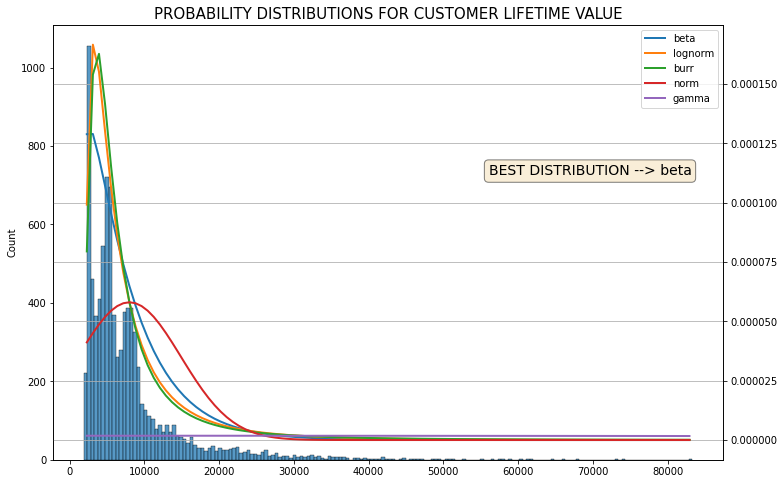

In [59]:
lifetime_value = numerical_customer_df['Customer Lifetime Value'].values
distribution_fitter = Fitter(lifetime_value, distributions = ['gamma', 'lognorm', 'beta', 'burr', 'norm'])
distribution_fitter.fit()

fig = plt.figure(figsize = (12, 8))

plt.title('PROBABILITY DISTRIBUTIONS FOR CUSTOMER LIFETIME VALUE', fontsize = 15)

ax = sns.histplot(lifetime_value)
second_axis = ax.twinx()
sns.histplot(distribution_fitter.plot_pdf())

text = f'BEST DISTRIBUTION --> {list(distribution_fitter.get_best().keys())[0]}'

props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)

ax.text(0.65, 0.68, text, transform = ax.transAxes, fontsize = 14,
        verticalalignment = 'top', bbox = props)

plt.show()

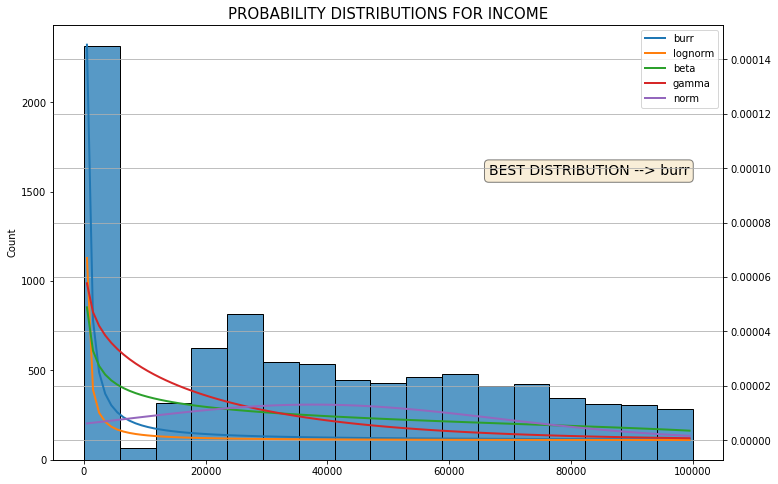

In [65]:
income = numerical_customer_df['Income'].values
distribution_fitter = Fitter(income, distributions = ['gamma', 'lognorm', 'beta', 'burr', 'norm'])
distribution_fitter.fit()

fig = plt.figure(figsize = (12, 8))

plt.title('PROBABILITY DISTRIBUTIONS FOR INCOME', fontsize = 15)

ax = sns.histplot(income)
second_axis = ax.twinx()
sns.histplot(distribution_fitter.plot_pdf())

text = f'BEST DISTRIBUTION --> {list(distribution_fitter.get_best().keys())[0]}'

props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)

ax.text(0.65, 0.68, text, transform = ax.transAxes, fontsize = 14,
        verticalalignment = 'top', bbox = props)

plt.show()

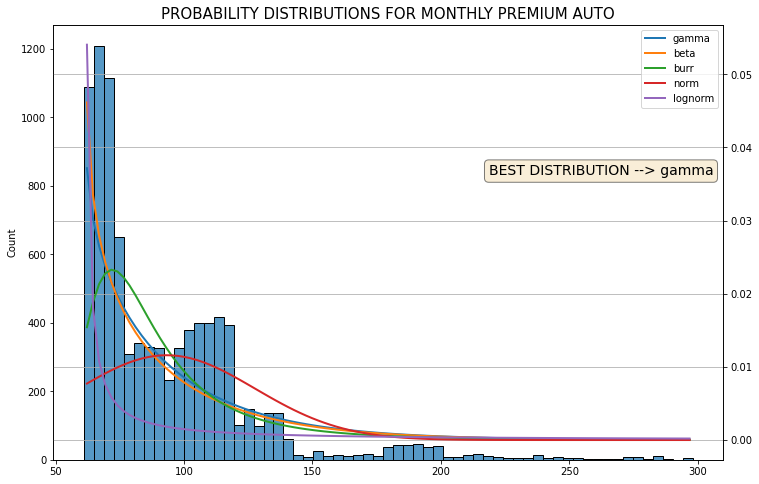

In [66]:
monthly_premium_auto = numerical_customer_df['Monthly Premium Auto'].values
distribution_fitter = Fitter(monthly_premium_auto, distributions = ['gamma', 'lognorm', 'beta', 'burr', 'norm'])
distribution_fitter.fit()

fig = plt.figure(figsize = (12, 8))

plt.title('PROBABILITY DISTRIBUTIONS FOR MONTHLY PREMIUM AUTO', fontsize = 15)

ax = sns.histplot(monthly_premium_auto)
second_axis = ax.twinx()
sns.histplot(distribution_fitter.plot_pdf())

text = f'BEST DISTRIBUTION --> {list(distribution_fitter.get_best().keys())[0]}'

props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)

ax.text(0.65, 0.68, text, transform = ax.transAxes, fontsize = 14,
        verticalalignment = 'top', bbox = props)

plt.show()

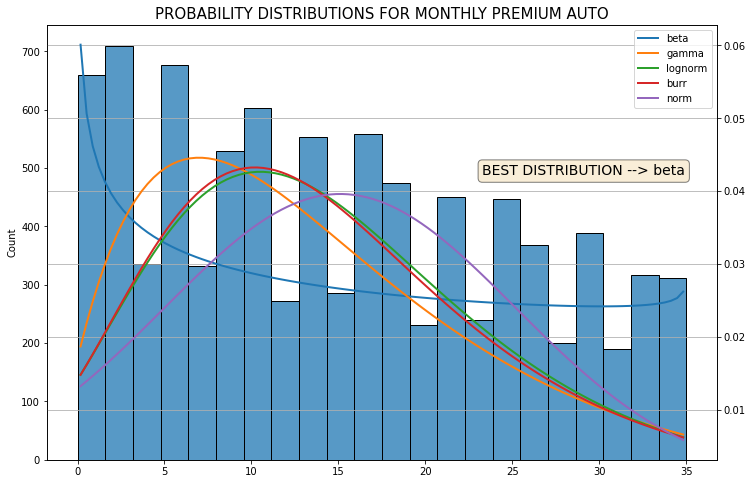

In [67]:
months_since_last_claim = numerical_customer_df['Months Since Last Claim'].values
distribution_fitter = Fitter(months_since_last_claim, distributions = ['gamma', 'lognorm', 'beta', 'burr', 'norm'])
distribution_fitter.fit()

fig = plt.figure(figsize = (12, 8))

plt.title('PROBABILITY DISTRIBUTIONS FOR MONTHS SINCE LAST CLAIM', fontsize = 15)

ax = sns.histplot(months_since_last_claim)
second_axis = ax.twinx()
sns.histplot(distribution_fitter.plot_pdf())

text = f'BEST DISTRIBUTION --> {list(distribution_fitter.get_best().keys())[0]}'

props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)

ax.text(0.65, 0.68, text, transform = ax.transAxes, fontsize = 14,
        verticalalignment = 'top', bbox = props)

plt.show()

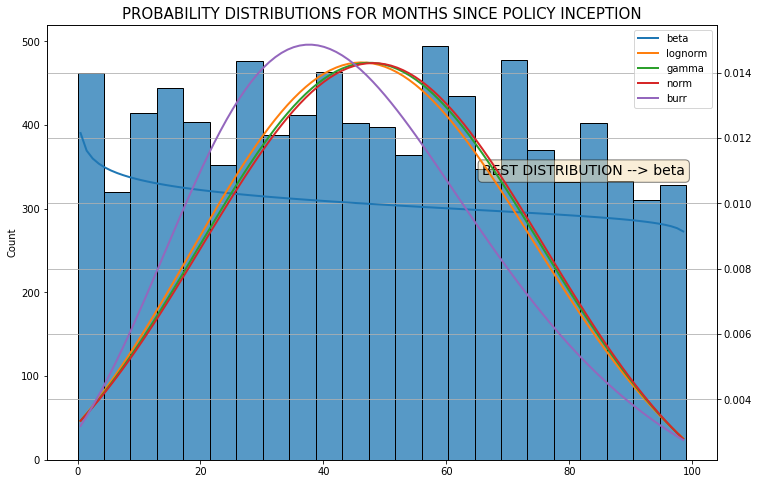

In [68]:
months_since_policy_inception = numerical_customer_df['Months Since Policy Inception'].values
distribution_fitter = Fitter(months_since_policy_inception, distributions = ['gamma', 'lognorm', 'beta', 'burr', 'norm'])
distribution_fitter.fit()

fig = plt.figure(figsize = (12, 8))

plt.title('PROBABILITY DISTRIBUTIONS FOR MONTHS SINCE POLICY INCEPTION', fontsize = 15)

ax = sns.histplot(months_since_policy_inception)
second_axis = ax.twinx()
sns.histplot(distribution_fitter.plot_pdf())

text = f'BEST DISTRIBUTION --> {list(distribution_fitter.get_best().keys())[0]}'

props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)

ax.text(0.65, 0.68, text, transform = ax.transAxes, fontsize = 14,
        verticalalignment = 'top', bbox = props)

plt.show()

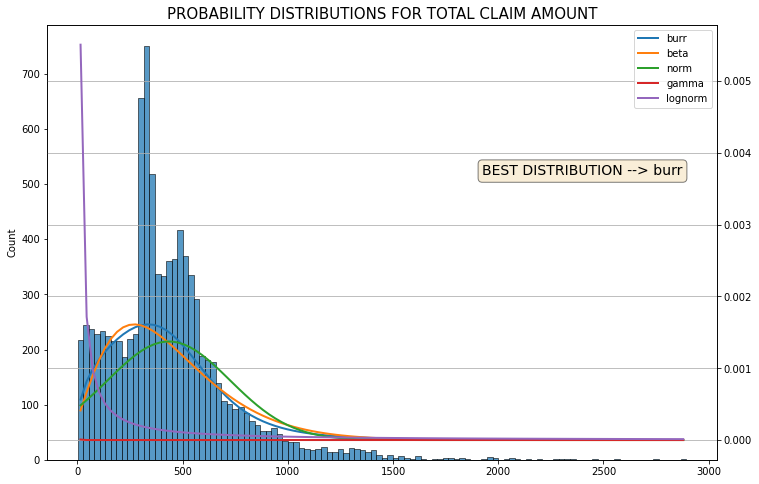

In [69]:
total_claim_amount = numerical_customer_df['Total Claim Amount'].values
distribution_fitter = Fitter(total_claim_amount, distributions = ['gamma', 'lognorm', 'beta', 'burr', 'norm'])
distribution_fitter.fit()

fig = plt.figure(figsize = (12, 8))

plt.title('PROBABILITY DISTRIBUTIONS FOR TOTAL CLAIM AMOUNT', fontsize = 15)

ax = sns.histplot(total_claim_amount)
second_axis = ax.twinx()
sns.histplot(distribution_fitter.plot_pdf())

text = f'BEST DISTRIBUTION --> {list(distribution_fitter.get_best().keys())[0]}'

props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)

ax.text(0.65, 0.68, text, transform = ax.transAxes, fontsize = 14,
        verticalalignment = 'top', bbox = props)

plt.show()

<h2>REVIEWING THE DISTRIBUTION OF THE DATA AFTER A LOG TRANSFORM</h2>

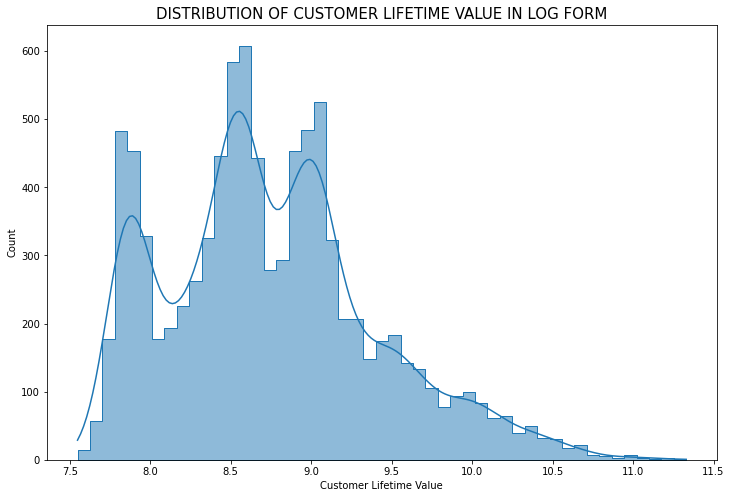

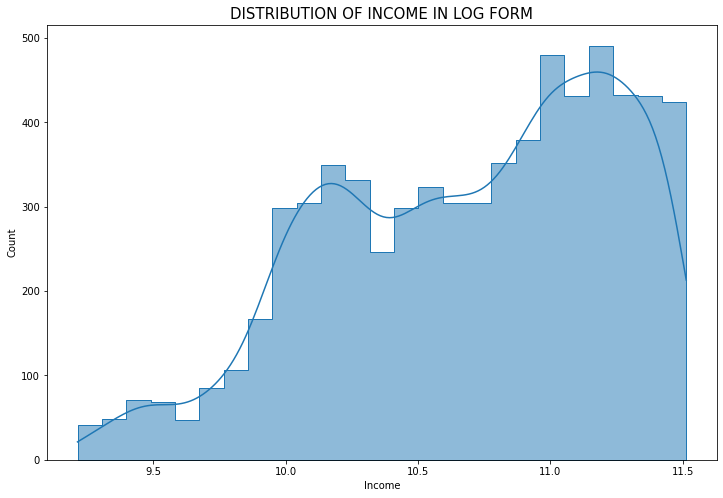

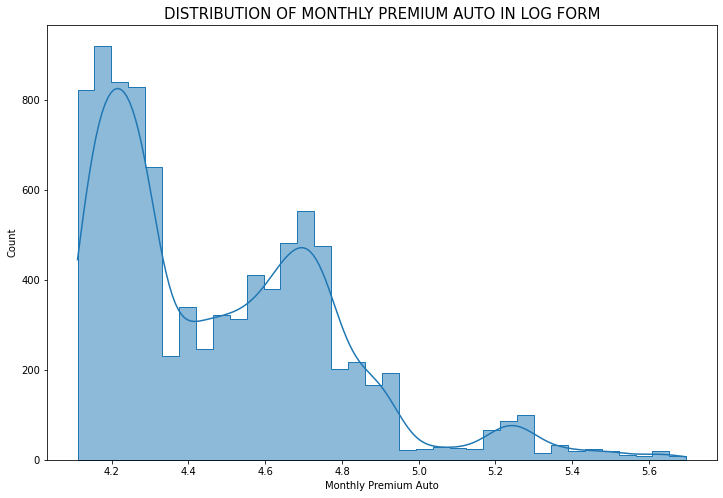

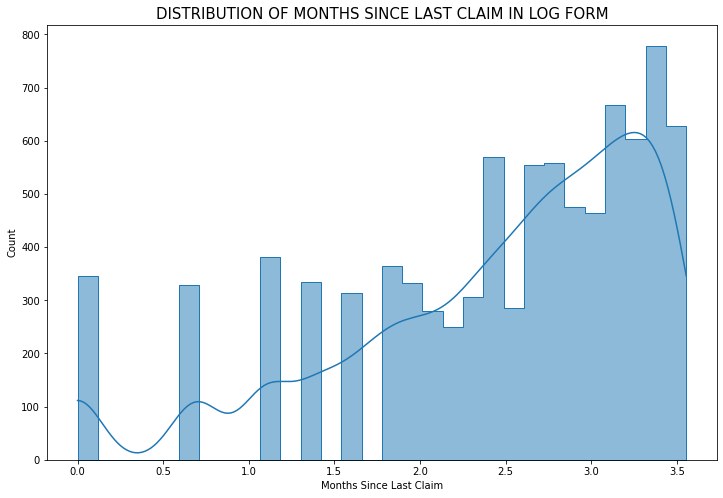

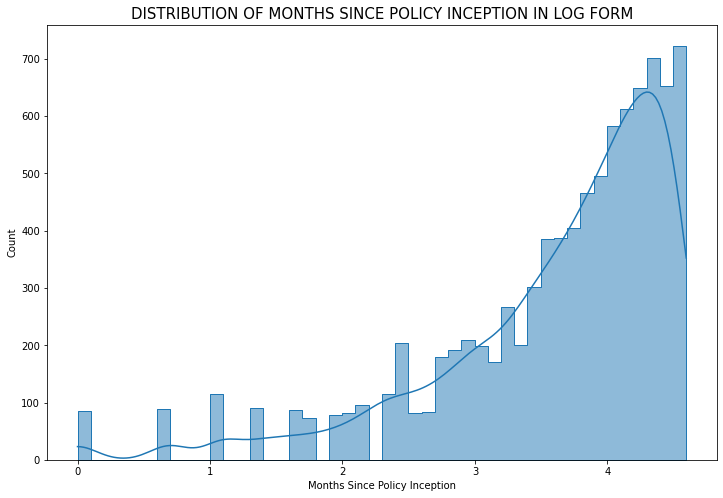

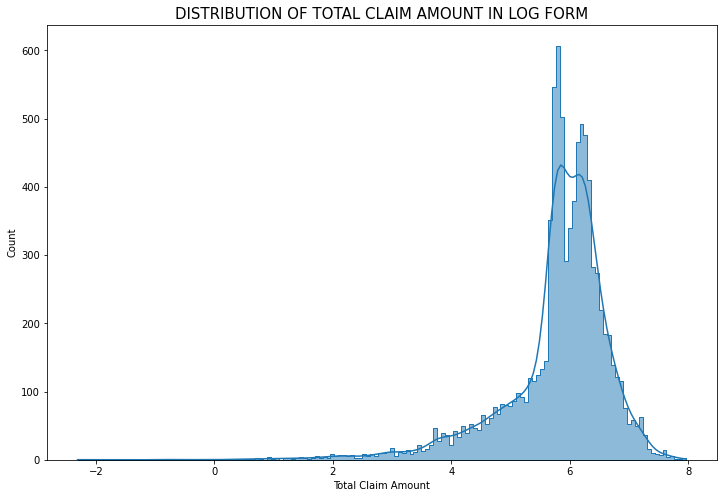

In [85]:
numerical_customer_df_copy = numerical_customer_df.copy()

def log_transfom(x):

    if np.isfinite(x) and x != 0:
        return np.log(x)

    else:
        return np.NAN
    
for column in numerical_customer_df_copy.columns:
    numerical_customer_df_copy[column] = numerical_customer_df_copy[column].apply(log_transfom)


for column in numerical_customer_df_copy.columns:

    fig = plt.figure(figsize = (12, 8))

    plt.title(f'DISTRIBUTION OF {column.upper()} IN LOG FORM', fontsize = 15)
    sns.histplot(x = column, data = numerical_customer_df_copy, element = 'step', kde = True)

    plt.show()